Mounted at /content/drive


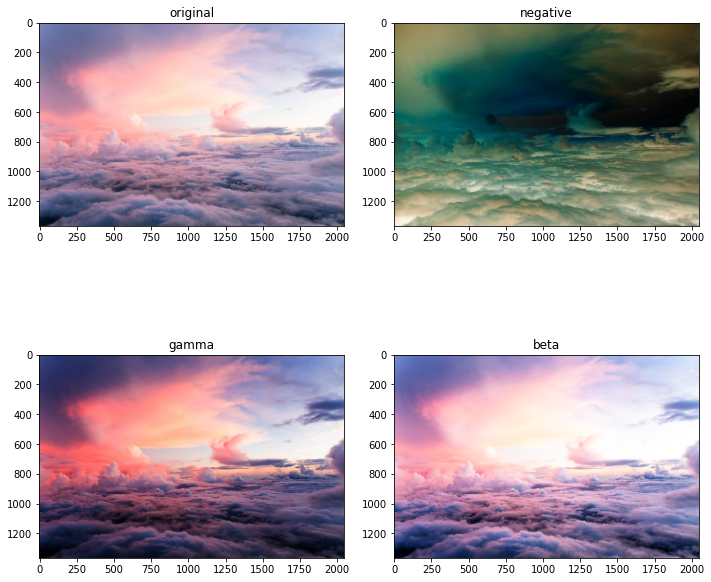

In [ ]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import scipy.special as special
from google.colab import drive
from google.colab.patches import cv2_imshow

drive.mount('/content/drive')
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/image_processing/cloud.bmp", -1)

def image_negative(f):
  g = 255 - f
  return g

def gamma_correction(f, gamma = 2.0):
  g = f.copy()
  nr,nc =    f.shape[:2]
  c = 255 / (255.0 ** gamma)
  table = np.zeros(256)
  for i in range(256):
    table[i] = round(i ** gamma * c, 0)
  if f.ndim != 3:
    for x in range(nr):
      for y in range(nc):
        g[x,y] = table[f[x, y]]
  else:
    for x in range(nr):
      for y in range(nc):
        for k in range(3):
          g[x, y, k] = table[f[x, y, k]]
  return g
def beta_correction(f, a = 2.0, b = 2.0):
  g = f.copy()
  nr,nc = f.shape[:2]
  x = np.linspace(0, 1,256)
  table = np.round(special.betainc(a, b, x) * 255,0)
  if f.ndim != 3:
    for x in range(nr):
      for y in range(nc):
        g[x,y] = table[f[x, y]]
  else:
    for x in range(nr):
      for y in range(nc):
         for k in range(3):
            g[x, y, k] = table[f[x, y, k]]
  return g

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = image_negative(RGB_img)
img2 = gamma_correction(RGB_img, 2)
img3 = beta_correction(RGB_img, a = 2, b = 2)
titles = ['original','negative','gamma','beta']
images = [RGB_img,img1,img2,img3]
plt.figure(figsize = (10, 10))

for i in range(4):
  plt.subplot(2, 2, i + 1), plt.imshow(images[i])
  plt.title(titles[i])

plt.tight_layout()
plt.show()

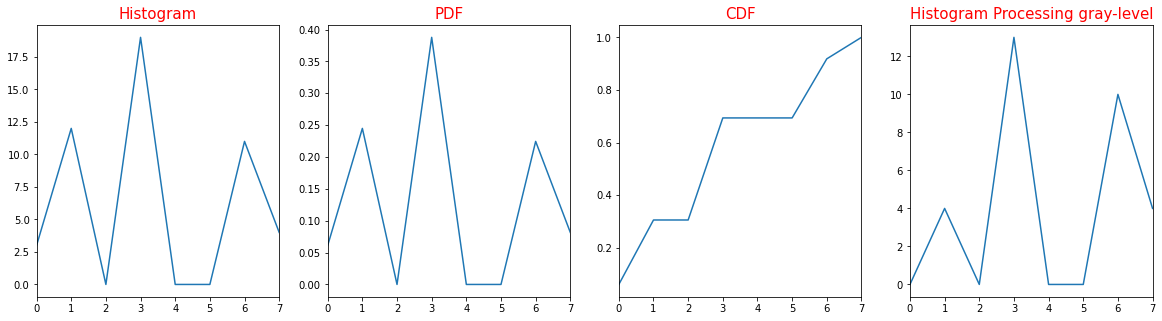

In [10]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

DATA = np.array([[0, 0, 1, 1, 1, 3, 3],
           [0, 1, 1, 1, 3, 3, 3],
           [1, 1, 1, 3, 3, 3, 6],
           [1, 1, 3, 3, 3, 6, 6],
           [1, 3, 3, 3, 6, 6, 6],
           [3, 3, 3, 6, 6, 7, 7],
           [3, 3, 6, 6, 6, 7, 7] ], dtype='uint8')

def histogram(data):#直方圖
    if data.ndim != 3:
        hist = cv2.calcHist([data], [0], None, [8], [0, 8])
    else:
        gray_data = cv2.cvtColor(data,cv2.COLOR_BGR2GRAY)
        hist = cv2.calcHist([gray_data], [0], None, [8], [0, 8])
    return hist

def PDF(data):
    hist = histogram(data)
    Sum = 0
    for i in range(8):
        Sum = hist[i] + Sum
    for j in range(8):
        hist[j] = hist[j] / Sum
    return hist

def CDF(data):
    hist = PDF(data)
    for i in range(1, 8):
        hist[i] = hist[i] + hist[i - 1]
    return hist

def histogram_processing(data):
    hist = histogram(data)
    cdf = CDF(data)
    for i in range(8):
        hist[i] = np.around(hist[i] * cdf[i])
    return hist

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.title('Histogram', fontsize = 15, color = 'r')
plt.plot(histogram(DATA))
plt.xlim([0, 7])

plt.subplot(142)
plt.title('PDF', fontsize = 15, color = 'r')
plt.plot(PDF(DATA))
plt.xlim([0, 7])

plt.subplot(143)
plt.title('CDF', fontsize = 15, color = 'r')
plt.plot(CDF(DATA))
plt.xlim([0, 7])

plt.subplot(144)
plt.title('Histogram Processing gray-level', fontsize = 15, color = 'r')
plt.plot(histogram_processing(DATA))
plt.xlim([0, 7])
plt.show()